In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib.pyplot as plt

### Problem 2.1

In [2]:
# Define the file path
file_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/prall.txt'

# Load the data and skip the header row if it exists
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, 
                   names=['Temperature', 'Pressure', 'Volume', 'Energy'])

C:\Users\jhyang\AppData\Local\Temp\ipykernel_11680\4170716334.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1,


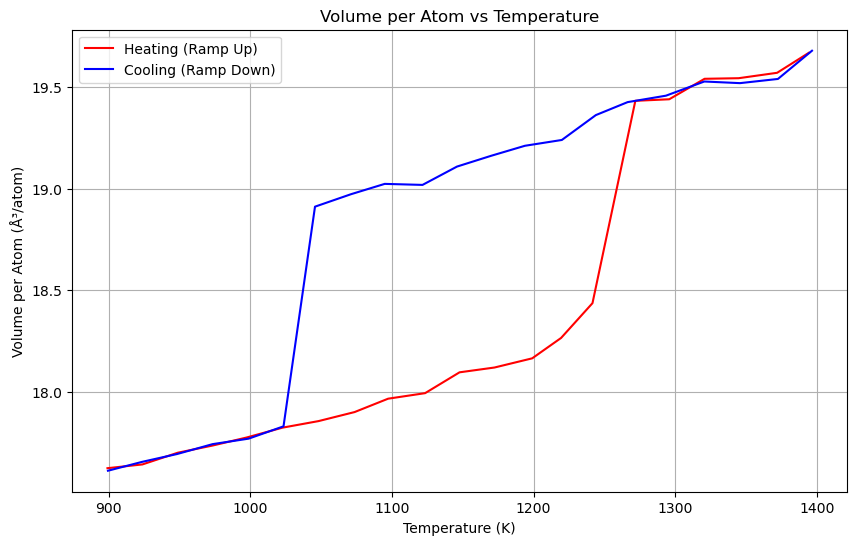

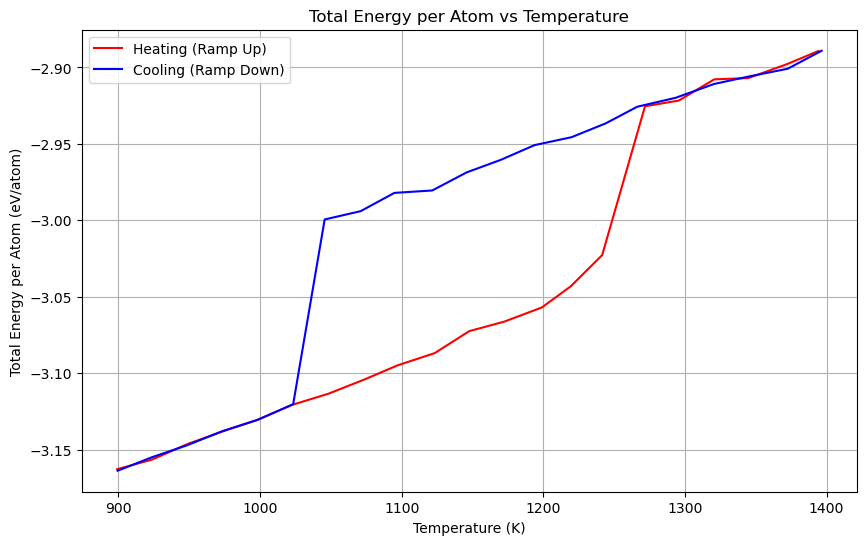

In [3]:
# Convert Volume and Energy to per atom values (assuming 32 atoms in simulation)
data['Volume_per_atom'] = data['Volume'] / 32
data['Energy_per_atom'] = data['Energy']

# Separate heating (ramp-up) and cooling (ramp-down) data
# Assuming the data is ordered such that the first half is ramp-up and the second half is ramp-down
mid_index = len(data) // 2
heating_data = data[:mid_index]
cooling_data = data[mid_index:]

# Plot Volume per atom vs Temperature
plt.figure(figsize=(10, 6))
plt.plot(heating_data['Temperature'], heating_data['Volume_per_atom'], label='Heating (Ramp Up)', color='red')
plt.plot(cooling_data['Temperature'], cooling_data['Volume_per_atom'], label='Cooling (Ramp Down)', color='blue')
plt.xlabel('Temperature (K)')
plt.ylabel('Volume per Atom (Å³/atom)')
plt.title('Volume per Atom vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Plot Energy per atom vs Temperature
plt.figure(figsize=(10, 6))
plt.plot(heating_data['Temperature'], heating_data['Energy_per_atom'], label='Heating (Ramp Up)', color='red')
plt.plot(cooling_data['Temperature'], cooling_data['Energy_per_atom'], label='Cooling (Ramp Down)', color='blue')
plt.xlabel('Temperature (K)')
plt.ylabel('Total Energy per Atom (eV/atom)')
plt.title('Total Energy per Atom vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

### Problem 2.3

C:\Users\jhyang\AppData\Local\Temp\ipykernel_11680\1042605274.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, names=['Temperature', 'Pressure', 'Volume', 'Energy'])
C:\Users\jhyang\AppData\Local\Temp\ipykernel_11680\1042605274.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solid_phase_heating_data['Energy'] = solid_phase_heating_data['Energy'] * 96485.3  # eV/atom to J/mol conversion factor


Specific Heat Coefficient A: -2.6535 J/mol/K
Specific Heat Coefficient B: 0.0358 J/mol/K^2


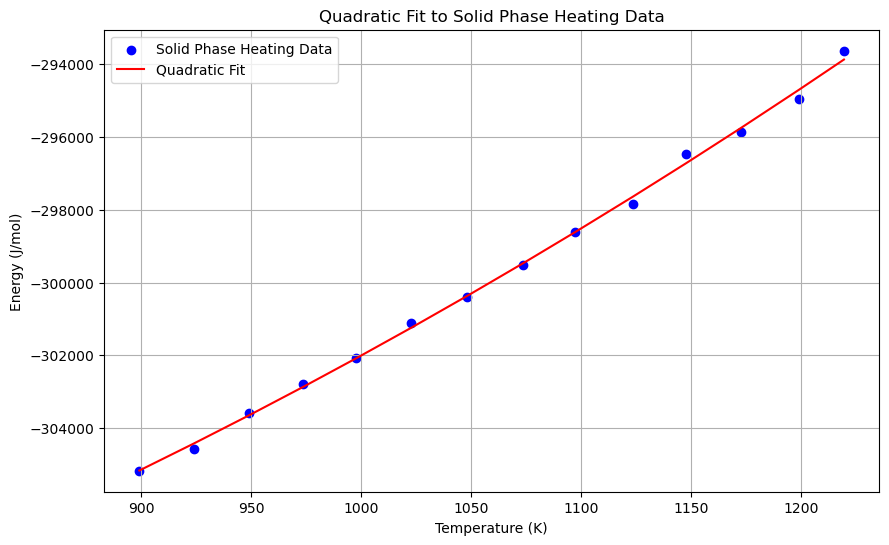

In [4]:
# Load the data
file_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/prall.txt'
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, names=['Temperature', 'Pressure', 'Volume', 'Energy'])

# Separate heating data (assuming the data is ordered, with heating in the first half)
mid_index = len(data) // 2
heating_data = data[:mid_index].reset_index(drop=True)

# Select solid phase data for heating (below melting point)
melting_temp = 1241.5  # melting temperature in K
solid_phase_heating_data = heating_data[heating_data['Temperature'] < melting_temp]

# Convert Energy from eV/atom to J/mol
solid_phase_heating_data['Energy'] = solid_phase_heating_data['Energy'] * 96485.3  # eV/atom to J/mol conversion factor

# Define the quadratic function for fitting
def quadratic(T, A, B, C):
    return A + B * T + C * T**2

# Fit the energy data to the quadratic function
T = solid_phase_heating_data['Temperature']
U = solid_phase_heating_data['Energy']  # Now in J/mol
params, covariance = curve_fit(quadratic, T, U)
A_fit, B_fit, C_fit = params

# Calculate the specific heat coefficients
A = B_fit  # Coefficient A in Table 6
B = 2 * C_fit  # Coefficient B in Table 6

# Output the results
print(f"Specific Heat Coefficient A: {A:.4f} J/mol/K")
print(f"Specific Heat Coefficient B: {B:.4f} J/mol/K^2")

# Plot to visualize the fit
plt.figure(figsize=(10, 6))
plt.scatter(T, U, label='Solid Phase Heating Data', color='blue')
plt.plot(T, quadratic(T, *params), label='Quadratic Fit', color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('Energy (J/mol)')
plt.title('Quadratic Fit to Solid Phase Heating Data')
plt.legend()
plt.grid(True)
plt.show()


### Problem 2.4

C:\Users\jhyang\AppData\Local\Temp\ipykernel_11680\3143973049.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, names=['Temperature', 'Pressure', 'Volume', 'Energy'])


Solid Linear Thermal Expansion Coefficient (Heating): 1.20179e-05 1/K
Liquid Linear Thermal Expansion Coefficient (Cooling): 1.23325e-05 1/K


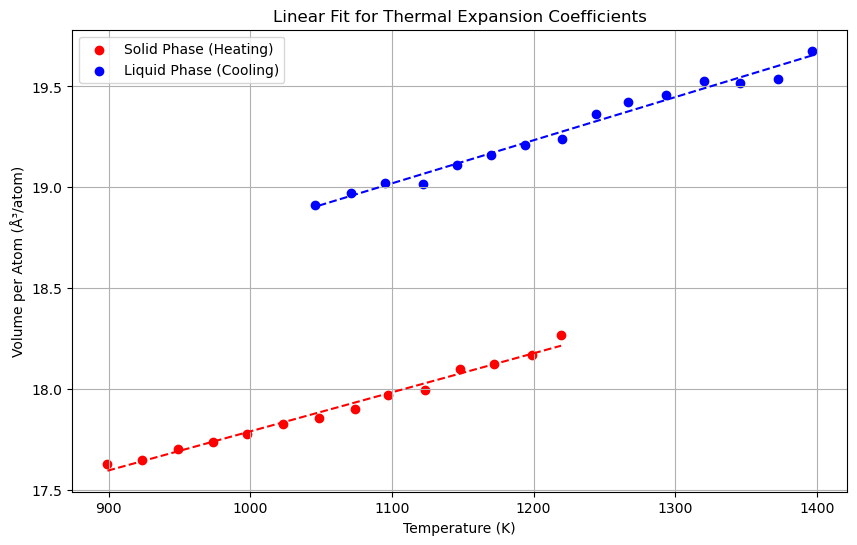

In [5]:
# Load data
file_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-1/prall.txt'
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, names=['Temperature', 'Pressure', 'Volume', 'Energy'])

# Convert volume to per atom basis (assuming 32 atoms in simulation)
data['Volume_per_atom'] = data['Volume'] / 32

# Separate heating and cooling data (assuming first half is heating and second half is cooling)
mid_index = len(data) // 2
heating_data = data[:mid_index]
cooling_data = data[mid_index:]

# Define melting temperature based on previous calculations
melting_temp_heating = 1241.5   # Adjust based on specific results
melting_temp_cooling = 1045.6   # Adjust based on specific results

# Select solid and liquid phases
solid_phase_heating = heating_data[heating_data['Temperature'] < melting_temp_heating]
liquid_phase_cooling = cooling_data[cooling_data['Temperature'] > melting_temp_cooling]

# Fit linear model to solid phase (heating curve)
slope_heating, intercept_heating, _, _, _ = linregress(solid_phase_heating['Temperature'], solid_phase_heating['Volume_per_atom'])
V_avg_heating = solid_phase_heating['Volume_per_atom'].mean()
alpha_heating = slope_heating / (3 * V_avg_heating)

# Fit linear model to liquid phase (cooling curve)
slope_cooling, intercept_cooling, _, _, _ = linregress(liquid_phase_cooling['Temperature'], liquid_phase_cooling['Volume_per_atom'])
V_avg_cooling = liquid_phase_cooling['Volume_per_atom'].mean()
alpha_cooling = slope_cooling / (3 * V_avg_cooling)

# Calculate linear thermal expansion coefficients
linear_alpha_heating = alpha_heating / 3
linear_alpha_cooling = alpha_cooling / 3

# Print final linear thermal expansion coefficients
print(f"Solid Linear Thermal Expansion Coefficient (Heating): {linear_alpha_heating:.5e} 1/K")
print(f"Liquid Linear Thermal Expansion Coefficient (Cooling): {linear_alpha_cooling:.5e} 1/K")

# Optional: If using Excel, include error values obtained from LINEST as well.

# Plot the linear fits for visualization
plt.figure(figsize=(10, 6))
plt.scatter(solid_phase_heating['Temperature'], solid_phase_heating['Volume_per_atom'], label='Solid Phase (Heating)', color='red')
plt.plot(solid_phase_heating['Temperature'], slope_heating * solid_phase_heating['Temperature'] + intercept_heating, color='red', linestyle='--')

plt.scatter(liquid_phase_cooling['Temperature'], liquid_phase_cooling['Volume_per_atom'], label='Liquid Phase (Cooling)', color='blue')
plt.plot(liquid_phase_cooling['Temperature'], slope_cooling * liquid_phase_cooling['Temperature'] + intercept_cooling, color='blue', linestyle='--')

plt.xlabel('Temperature (K)')
plt.ylabel('Volume per Atom (Å³/atom)')
plt.title('Linear Fit for Thermal Expansion Coefficients')
plt.legend()
plt.grid(True)
plt.show()

### Problem 2.5

C:\Users\jhyang\AppData\Local\Temp\ipykernel_11680\18755147.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1,


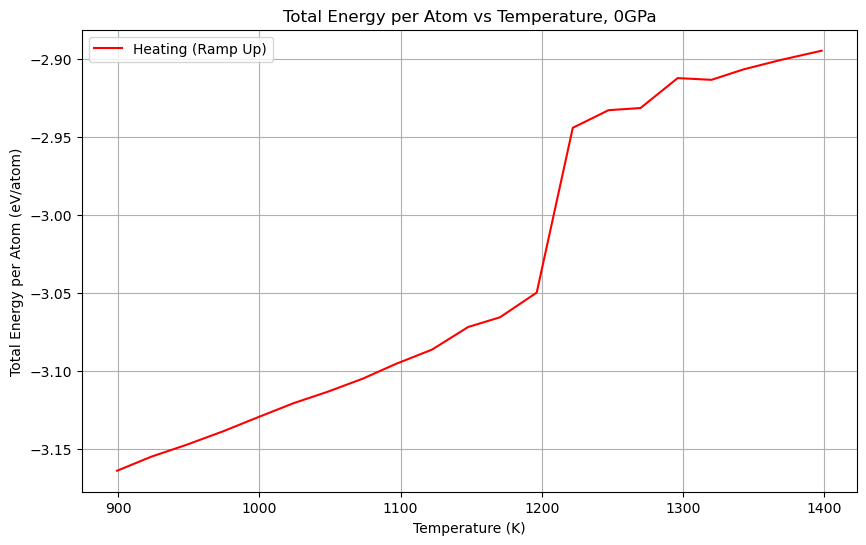

Melting Temperature during Heating (Method 1 - Maximum Rate of Change): 1222.00545510911 K
Melting Temperature during Heating (Method 2 - Significant Energy Jump): 1222.00545510911 K


C:\Users\jhyang\AppData\Local\Temp\ipykernel_11680\18755147.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heating_data['Energy_derivative'] = heating_data['Energy_per_atom'].diff() / heating_data['Temperature'].diff()


In [6]:
# Define the file path
file_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_2-5/0GPa/prall.txt'

# Load the data and skip the header row if it exists
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, 
                   names=['Temperature', 'Pressure', 'Volume', 'Energy'])

# Convert Volume and Energy to per atom values (assuming 32 atoms in simulation)
data['Volume_per_atom'] = data['Volume'] / 32
data['Energy_per_atom'] = data['Energy']

# Separate heating (ramp-up) and cooling (ramp-down) data
# Assuming the data is ordered such that the first half is ramp-up and the second half is ramp-down
mid_index = len(data) // 2
heating_data = data[:mid_index]
cooling_data = data[mid_index:]

# Plot Energy per atom vs Temperature
plt.figure(figsize=(10, 6))
plt.plot(heating_data['Temperature'], heating_data['Energy_per_atom'], label='Heating (Ramp Up)', color='red')
#plt.plot(cooling_data['Temperature'], cooling_data['Energy_per_atom'], label='Cooling (Ramp Down)', color='blue')
plt.xlabel('Temperature (K)')
plt.ylabel('Total Energy per Atom (eV/atom)')
plt.title('Total Energy per Atom vs Temperature, 0GPa')
plt.legend()
plt.grid(True)
plt.show()

# Method 1: Find the melting temperature by identifying the maximum change rate of energy with respect to temperature
heating_data['Energy_derivative'] = heating_data['Energy_per_atom'].diff() / heating_data['Temperature'].diff()
melting_index_1 = heating_data['Energy_derivative'].idxmax()
melting_temp_1 = heating_data.loc[melting_index_1, 'Temperature']
print(f"Melting Temperature during Heating (Method 1 - Maximum Rate of Change): {melting_temp_1} K")

# Method 2: Find the melting temperature by detecting a significant energy jump
energy_jump_threshold = 0.05  # e.g., 0.05 eV/atom
energy_diff = heating_data['Energy_per_atom'].diff()
melting_index_2 = energy_diff[energy_diff > energy_jump_threshold].index[0]  # Find the first jump above the threshold
melting_temp_2 = heating_data.loc[melting_index_2, 'Temperature']
print(f"Melting Temperature during Heating (Method 2 - Significant Energy Jump): {melting_temp_2} K")


In [7]:
# Step 1: Define your data (assumed here, replace with your actual data)
selected_pressures = np.array([0, 10e9, 20e9, 50e9, 80e9, 100e9])  # Pressures in Pa
selected_temperatures = np.array([1196.45, 1273.79, 1024.35, 998.96, 1098.53, 1323.04])  # Corresponding melting temperatures in K

# Step 2: Calculate the slope ∂P/∂T using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(selected_temperatures, selected_pressures)
partial_P_T = slope  # Value of ∂P/∂T
print(f"Slope ∂P/∂T (Clausius-Clapeyron Equation): {partial_P_T:.2e} Pa/K")

# Step 3: Calculate average ΔV
# Assuming prall_volumes and rampdown_volumes are defined as arrays with volumes in m³/atom
# For demonstration, use example data (replace with your actual volumes)
prall_volumes = np.array([1.0e-29, 1.05e-29, 1.03e-29, 1.02e-29, 1.04e-29, 1.06e-29])
rampdown_volumes = np.array([0.9e-29, 0.95e-29, 0.93e-29, 0.92e-29, 0.94e-29, 0.96e-29])
delta_V = np.mean(prall_volumes) - np.mean(rampdown_volumes)  # Average ΔV
print(f"Average ΔV: {delta_V:.2e} m³")

# Step 4: Calculate entropy change ΔS using Clausius-Clapeyron equation
delta_S = delta_V * partial_P_T  # Entropy change ΔS
print(f"Entropy Change ΔS: {delta_S:.2e} J/K")

# Step 5: Calculate enthalpy change ΔH using ΔH = ΔS * Tm
Tm_avg = np.mean(selected_temperatures)  # Average Tm if needed, but better to use the specific Tm at each pressure
delta_H = delta_S * Tm_avg  # Enthalpy change ΔH
print(f"Enthalpy Change ΔH: {delta_H:.2e} J")

# Step 6: Convert ΔS and ΔH to eV/atom
# 1 eV = 1.60218e-19 J
delta_S_eV = delta_S / 1.60218e-19
delta_H_eV = delta_H / 1.60218e-19
print(f"Entropy Change ΔS (eV/K atom): {delta_S_eV:.2e}")
print(f"Enthalpy Change ΔH (eV/atom): {delta_H_eV:.2e}")

# Step 7: Prepare results table
table = {
    "Tm (K)": [Tm_avg],  # or use specific Tm at each pressure
    "P (Pa)": [", ".join(f"{p:.2e}" for p in selected_pressures)],  # Convert to string for display
    "T (K)": [", ".join(f"{t:.2f}" for t in selected_temperatures)],  # Convert to string for display
    "∂P/∂T (Pa/K)": [partial_P_T],
    "ΔS (eV/K atom)": [delta_S_eV],
    "ΔH (eV/atom)": [delta_H_eV],
    "ΔS(P0, Tm) = ΔH(P0, Tm) / Tm (eV/K atom)": [delta_H_eV / Tm_avg]
}

# Convert to DataFrame
df_table = pd.DataFrame(table)

# Display the table
df_table.style.format({
    "Tm (K)": "{:.2f}",
    "∂P/∂T (Pa/K)": "{:.2e}",
    "ΔS (eV/K atom)": "{:.2e}",
    "ΔH (eV/atom)": "{:.2e}",
    "ΔS(P0, Tm) = ΔH(P0, Tm) / Tm (eV/K atom)": "{:.2e}"
}).set_caption("Calculation Results Table")


Slope ∂P/∂T (Clausius-Clapeyron Equation): 4.18e+07 Pa/K
Average ΔV: 1.00e-30 m³
Entropy Change ΔS: 4.18e-23 J/K
Enthalpy Change ΔH: 4.82e-20 J
Entropy Change ΔS (eV/K atom): 2.61e-04
Enthalpy Change ΔH (eV/atom): 3.01e-01


,Tm (K),P (Pa),T (K),∂P/∂T (Pa/K),ΔS (eV/K atom),ΔH (eV/atom),"ΔS(P0, Tm) = ΔH(P0, Tm) / Tm (eV/K atom)"
0,1152.52,"0.00e+00, 1.00e+10, 2.00e+10, 5.00e+10, 8.00e+10, 1.00e+11","1196.45, 1273.79, 1024.35, 998.96, 1098.53, 1323.04",4.18e+07,2.61e-04,3.01e-01,2.61e-04


In [8]:
# Given values
S_calculated = 2.61e-4  # eV/(K atom)
S_experimental = 9.62e-4  # eV/(K atom), converted from 9.28 J/(mol-K)

# Calculate the percentage error
percent_error = abs((S_calculated - S_experimental) / S_experimental) * 100
print(f"Percentage Error: {percent_error:.2f}%")

Percentage Error: 72.87%
